<a href="https://colab.research.google.com/github/shubhamByte/Machine-Learning/blob/main/Pytorch%20on%20sklearn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [100]:
# loading the dataset and splitting
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [101]:
# Convert data to PyTorch tensors         datatype should be same as given otherwise 
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [102]:
y_train[2].dtype

torch.int64

In [103]:
input_size, hidden_size1, hidden_size2, output_size, num_epochs = 4, 4, 5, 3, 100

In [104]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation1(x)
        x = self.output(x)
        x = self.activation2(x)
        return x

In [105]:
model = NeuralNetwork()

optimizer = optim.Adam(model.parameters(), lr = 0.01) 
criterion = nn.CrossEntropyLoss()

training_loss_list = []
testing_loss_list =[]

best_loss = 10000
early_stopping = 5
no_improvement_count = 0

In [106]:
for epoch in range(num_epochs):

    optimizer.zero_grad()
    yhat = model(X_train)
    loss = criterion(yhat, y_train)
    loss.backward()
    optimizer.step()

    # Calculate train loss and accuracy
    train_loss = loss.item()
    train_pred = model(X_train).argmax(dim=1)
    train_accuracy = (train_pred == y_train).float().mean().item()
    
    # Calculate test loss and accuracy
    test_output = model(X_test)
    test_loss = criterion(test_output, y_test).item()
    test_pred = test_output.argmax(dim=1)
    test_accuracy = (test_pred == y_test).float().mean().item()
    
    print(f'Epoch: [{epoch + 1}]    Training loss: {train_loss:.3f} Training Accur: {train_accuracy:.3f}    Testing loss: {test_loss:.3f} Testing Accur: {test_accuracy:.3f}')
    
    training_loss_list.append(train_loss)
    testing_loss_list.append(test_loss)

    # Check for early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        no_improvement_count = 0
    elif no_improvement_count < early_stopping:
        no_improvement_count += 1
    else:
        break

print('Finished Training.')

Epoch: [1]    Training loss: 1.119 Training Accur: 0.346    Testing loss: 1.129 Testing Accur: 0.261
Epoch: [2]    Training loss: 1.116 Training Accur: 0.346    Testing loss: 1.124 Testing Accur: 0.261
Epoch: [3]    Training loss: 1.112 Training Accur: 0.346    Testing loss: 1.119 Testing Accur: 0.261
Epoch: [4]    Training loss: 1.109 Training Accur: 0.346    Testing loss: 1.115 Testing Accur: 0.261
Epoch: [5]    Training loss: 1.107 Training Accur: 0.346    Testing loss: 1.112 Testing Accur: 0.261
Epoch: [6]    Training loss: 1.104 Training Accur: 0.346    Testing loss: 1.109 Testing Accur: 0.261
Epoch: [7]    Training loss: 1.103 Training Accur: 0.346    Testing loss: 1.106 Testing Accur: 0.261
Epoch: [8]    Training loss: 1.101 Training Accur: 0.409    Testing loss: 1.104 Testing Accur: 0.304
Epoch: [9]    Training loss: 1.099 Training Accur: 0.472    Testing loss: 1.101 Testing Accur: 0.391
Epoch: [10]    Training loss: 1.098 Training Accur: 0.386    Testing loss: 1.099 Testing Ac

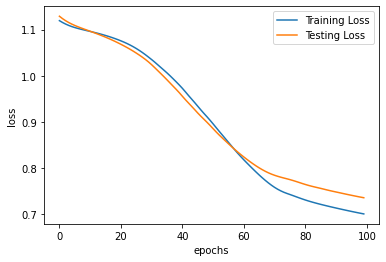

In [107]:
x_values = range(len(training_loss_list)) 
plt.plot(x_values,training_loss_list, label = "Training Loss")
plt.plot(x_values,testing_loss_list, label = "Testing Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()